# Weighted Averages

### Goals:

1. To review the concept of weighted averages.
2. To understand when it makes sense to use weighted averages. 
3. To understand how histograms and weighted averages are tools that can be used to summarize large data sets a much smaller set of numbers.

### Timing

1. Try to finish this notebook in 30-35 minutes

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1ZmV0GQr0SfdIbLfKm5ibpRwBmCR8KGVTmVatiQr8sxI/edit?usp=sharing

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

###  New functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.integers          | generates a random integer |
|    rng.uniform           | generates a random real number from a flat or 'uniform' distribution |
|    plt.hist              | Makes a "histogram" plotting the number of values that fall into a set of bins |
|    plt.xlabel            | Set the x-axis label of a figure (also plt.ylabel) |  

## Weighted averages, in the context you are probably most familiar with them

Being students, I'm sure that you are familiar with weighted averages as they apply to course grades.  For example, you might be something like: "Homework will be 20% of your grade, the two short mid-term exams will be 20% each, and the final exam will be 40%".

### Question:  

#### 1.1  Write down the formula for grades that corresponds to the sentence above.

## Summary data and weighted averages

Now we are going to work through an exercise that shows another context in which weighted averages occur.  



In [28]:
rng = np.random.default_rng(42)

In [29]:
def rollD6(rng, nTimes):
    return rng.integers(low=1, high=6, endpoint=True, size=nTimes)

In [30]:
# Roll the dice 60 times.
diceRolls = rollD6(rng, 60)

# And count the number of times each value occurred
values = np.bincount(diceRolls)
weights = np.arange(7)

In [31]:
print(diceRolls)
print(values, weights)

[1 5 4 3 3 6 1 5 2 1 4 6 5 5 5 5 4 1 6 3 4 3 2 6 5 4 3 5 4 3 3 2 1 4 6 1 6
 5 2 4 1 5 5 3 1 6 3 6 5 5 5 2 3 3 3 1 4 1 5 5]
[ 0 10  5 12  9 16  8] [0 1 2 3 4 5 6]


### Now let's write down the equation for the mean of the data two different ways

#### Using the indvidual rolls

It would look something like 

(4 + 4 + 4 + 4 + 6 + 1 + ... + 6 + 3) / 60

#### Using the bin counts

It would look something like

((10 * 1) + (4 * 2) + (9 * 3) + (16 * 4) + (11 * 5) + (10 * 6)) / 60

### Formulas

mean = $\frac{\sum_i x_i}{n}$

weighted mean = $\frac{\sum_i w_i * x_i}{\sum w_i}$

#### Let's compute both of those using numpy and compare them to the numpy.mean() function

In [32]:
mean_v1 = np.sum(diceRolls) / len(diceRolls)
mean_v2 = np.sum(values*weights) / len(diceRolls)
mean_check = np.mean(diceRolls)

In [33]:
print("V1:    ", mean_v1)
print("V2:    ", mean_v2)
print("Check: ", mean_check)

V1:     3.6666666666666665
V2:     3.6666666666666665
Check:  3.6666666666666665


You can also programatically check that two numbers (arrays) are equal up to computer precision using `np.isclose` (`np.allclose`)

In [34]:
print(f"""
V1 == V2    : {np.isclose(mean_v1, mean_v2)}
V1 == Check : {np.isclose(mean_v1, mean_check)}
V2 == Check : {np.isclose(mean_v2, mean_check)}
""")


V1 == V2    : True
V1 == Check : True
V2 == Check : True



#### Pro-tip, array multiplication in numpy:

(value*weights) actually multiplies each element in value by each element in weights, 
it is equivalent to 

    n = len(values)
    outArray = np.zero((n))
    for i in range(n):
        outArray[i] = values[i] * weights[i]
        
Or, written mathemetically:

$\bf{v} = \bf{x}\bf{w}$ is equivalent to $v_i = x_i * w_i$ for each element $i$, and we use **bold** to indicate arrays.
        

In [35]:
values*weights

array([ 0, 10, 10, 36, 36, 80, 48])

### When summary data "loses information"

Now, instead of rolling a dice, lets pick a bunch of real numbers between 0.5 and 6.5 and use a histogram to summarize that information.

The "a.u." on the axes labels stands for "abitrary units".

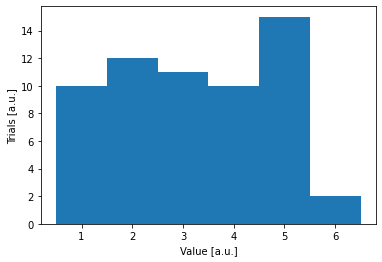

In [36]:
dataSample = rng.uniform(low=0.5, high=6.5, size=60)
hist = plt.hist(dataSample, bins=np.linspace(0.5, 6.5, 7))
plt.xlabel("Value [a.u.]")
plt.ylabel("Trials [a.u.]")
plt.show()

In [37]:
# This grabs the bin values and bin edges from the hist data structure that matplotlib returned
values = hist[0]
edges = hist[1]
centers = (edges[0:-1] + edges[1:])/2.

print("Average bin content:  ", np.mean(values))
print("Average value:        ", np.mean(dataSample))
print("Average binned value: ", np.sum(values*centers) / len(dataSample))

Average bin content:   10.0
Average value:         3.2760712798707794
Average binned value:  3.2333333333333334


### Questions for discussion

#### 2.1 Explain, in your own words, the difference between the three values computed in the previous cell.  

#### 2.2 How would these numbers change if you changed the bin size when histograming the data?  E.g., which would get bigger if you used smaller bins, which would get smaller, and which would stay the same?

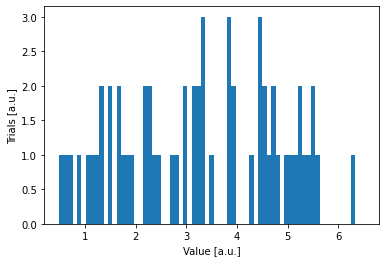

Average bin content:   0.8695652173913043
Average value:         3.2760712798707794
Average binned value:  3.276811594202899


In [38]:
# This is a cell to try out different binnings for summarize the data
hist2 = plt.hist(dataSample, bins=np.linspace(0.5, 6.5, 70))
plt.xlabel("Value [a.u.]")
plt.ylabel("Trials [a.u.]")
plt.show()

values2 = hist2[0]
edges2 = hist2[1]
centers2 = (edges2[0:-1] + edges2[1:])/2.

print("Average bin content:  ", np.mean(values2))
print("Average value:        ", np.mean(dataSample))
print("Average binned value: ", np.sum(values2*centers2) / len(dataSample))

### Questions for discussion

#### 3.1 In many cases the data might be presented already summarized, or binned into a histogram.  Can you think of some examples in real-world data when this might be the case?  List a few.

#### 3.2 Often, the way we collect data involves some averaging or sampling, so that we are effectively making a histogram as we actually collect the data.  An example of this might be an X-ray detector that counts how many X-rays it detects per second for 6 seconds, then only sends the total number of X-rays it detected each second. (I.e., it sends out 6 numbers).  Explain how this corresponds to the example above.  What does the total number of X-rays seen correspond to from our earlier example?  How about the rate of X-rays?
